In [1]:
import numpy as np
import matplotlib.pyplot as plt

from glacier import *
from tributary import *

ELA_0 = np.genfromtxt("ELA_spitsbergen.txt")
t0 = ELA_0[0,0]
E0 = ELA_0[0,1]

[x1,y1] = np.genfromtxt("elevation_1.txt")

tributary_data = np.genfromtxt('Glacierbuckets.csv', delimiter=";", skip_header=1, usecols=(1,2,3,4,5,6,7))

parameters = [alpha, beta, nu, kappa, c, w, L0] = np.genfromtxt("parameters_veteranen.txt")

figsize = (8,4)
dpi = 300

In [2]:
v1 = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=t0, E=E0, name="Veteranen")
# v2 = CustomBedModel(x=x1, y=y1, alpha=alpha, beta=beta, nu=nu, kappa=kappa, c=c, w=w, L0=L0, t0=t0, E=E0, name="Veteranen")

glaciers = [v1]
# glaciers = [v1, v2]

for glacier in glaciers:   
    glacier.width_glacier = 2930
    for [L, w0, h0, w1, h1, s, q] in tributary_data:
        glacier.add_bucket_tributary(L, w0, w1, h0, h1)

t = 1 #year
dt = 0.1

for i in range(np.shape(ELA_0)[0]-1):
    # change E at the start of each year
    glaciers[0].integrate(dt, t, E=ELA_0[i+1,1])
    
# for i in range(np.shape(ELA_0)[0]-1):
#     # change E during the year
#     glaciers[1].integrate(dt, t, E=ELA_0[i,1], E_new=ELA_0[i+1,1])

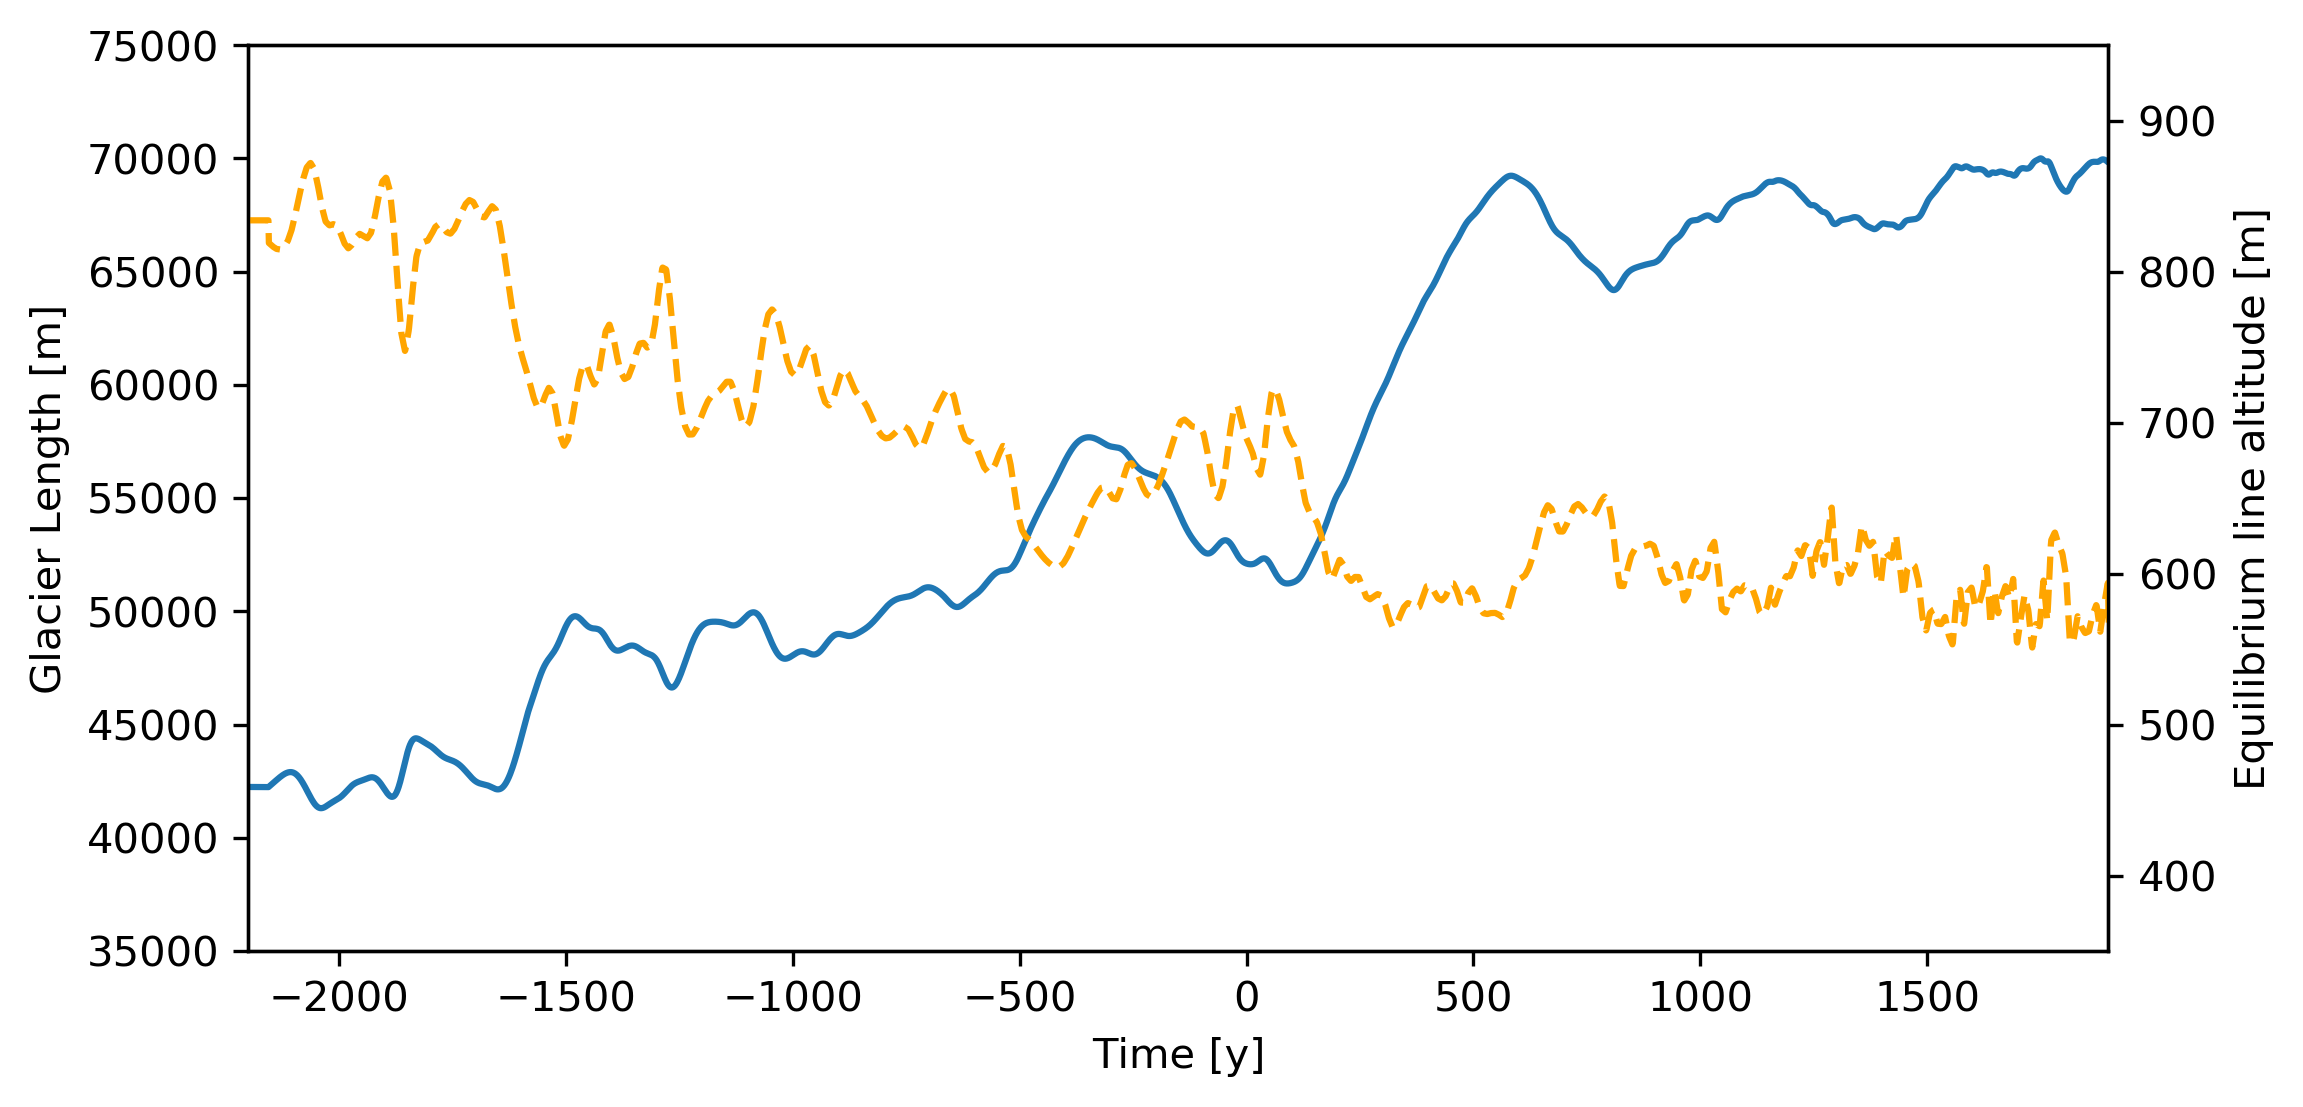

In [3]:
fig, ax1 = plt.subplots()
fig.set_size_inches(figsize)
fig.set_dpi(dpi)

for glacier in glaciers:
    ax1.plot(glacier.t, glacier.L, label=glacier.name)
    
# plt.legend()
# plt.grid()
# plt.title("Glacier length")

# ax1.plot([-5000, 5000], 2*[45000], "--", c="gray", linewidth=1) # sea
ax1.set_ylim(35000, 75000)
# ax1.set_yticks(np.arange(35000, 75001, 10000))

plt.xlim([-2200, 1900])
plt.xlabel("Time [y]")
plt.ylabel("Glacier Length [m]")


ax2 = ax1.twinx()    
ax2.plot(ELA_0[:,0], ELA_0[:,1], "--", c="orange")
ax2.set_ylabel("Equilibrium line altitude [m]")
ax2.set_ylim([350, 950])


plt.savefig("figures/veteranen_past_4000.png")
plt.show()

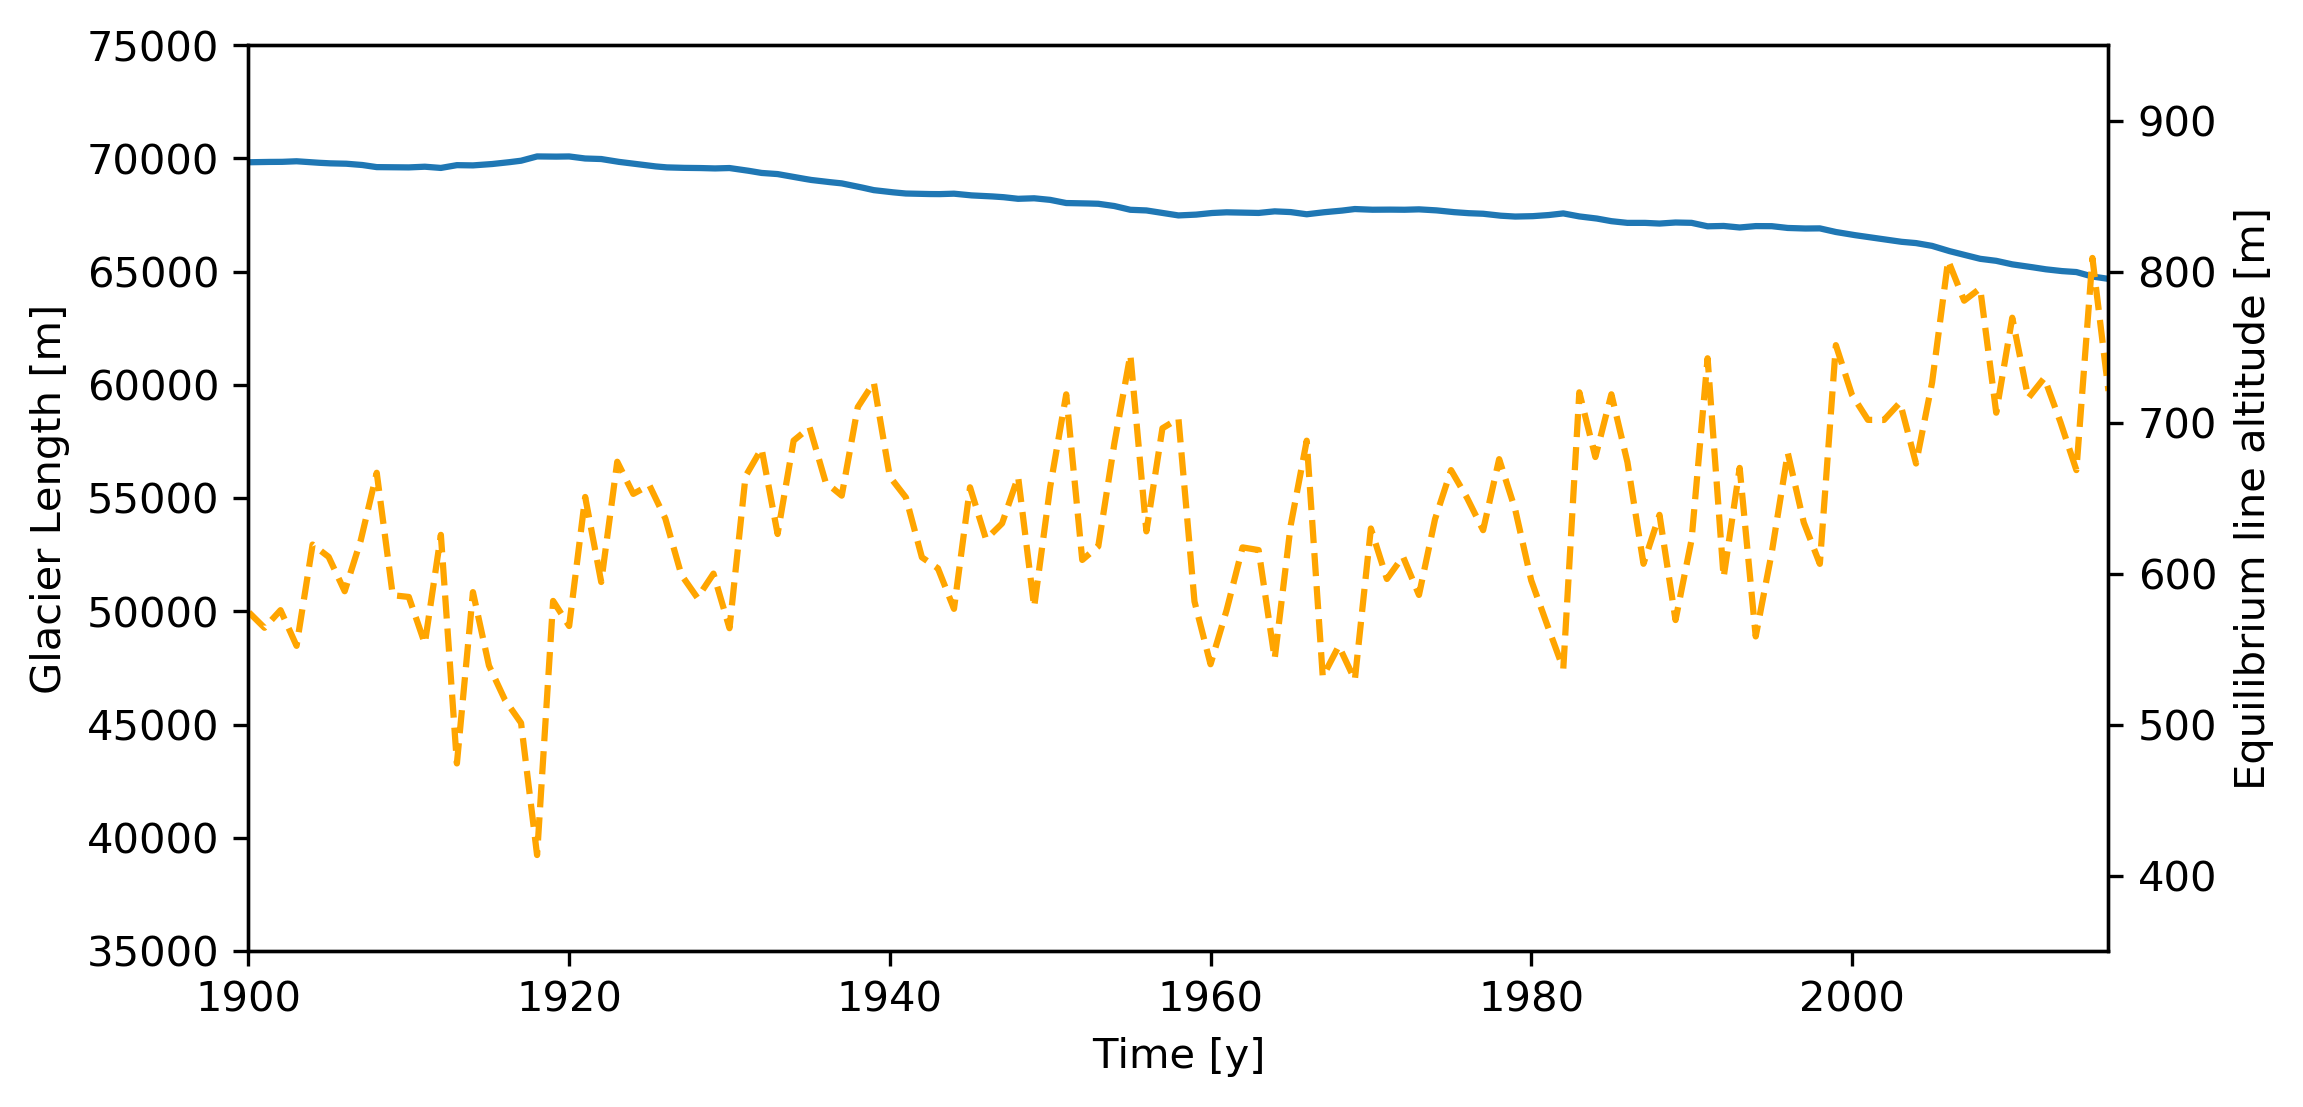

In [4]:
fig, ax1 = plt.subplots()
fig.set_size_inches(figsize)
fig.set_dpi(dpi)

for glacier in glaciers:
    ax1.plot(glacier.t, glacier.L, label=glacier.name)
    
# plt.legend()
# plt.grid()
# plt.title("Glacier length")

# ax1.plot([-5000, 5000], 2*[45000], "--", c="gray", linewidth=1) # sea
ax1.set_ylim(35000, 75000)
# ax1.set_yticks(np.arange(35000, 75001, 10000))

plt.xlim([1900, np.max(ELA_0[:,0])])
plt.xlabel("Time [y]")
plt.ylabel("Glacier Length [m]")


ax2 = ax1.twinx()    
ax2.plot(ELA_0[:,0], ELA_0[:,1], "--", c="orange")
ax2.set_ylabel("Equilibrium line altitude [m]")
ax2.set_ylim([350, 950])


plt.savefig("figures/veteranen_past_0150.png")
plt.show()